# Parte 3

## Esercizio 1
Dire per quali valori di  la soluzione dell’equazione $x^2 - 4x + \alpha = 0$ risulta essere un problema mal condizionato.


### Svolgimento

Un indice ci condizionamento elevato indica che ci trova di fronte ad un problema mal condizionato.

Per il calcolo dell'indice di condizionamento si ricorre alla seguente formula:


$$ K(\alpha) = \left| \frac{f'(\alpha)}{f(\alpha)} \alpha \right| $$

Per valutare il malcondizionamento del problema bisogna considerare le due radici dell'equazione date da:


$$ x_{1,2} = 2 \pm \sqrt{4 - \alpha} $$

Bisogna studiare per quali valori di  l'indice di condizionamento cresce esponenzialmente. Si ottiene che l'indice di condizionamento tende a infinito per $2 - \sqrt{4 -\alpha} \to 0,\ \Rightarrow \alpha = 4$ .

$\alpha$ assume questo valore se si ha che $|{\alpha}|$ è più piccolo dello spacing in $[2^2,2^3]$, in quel caso infatti  si approssima a 4. 

In generale il problema risulta mal condizionato se  è più piccolo dello spacing in $[2^2,2^3]$. 

Nel secondo caso si ottiene un indice di condizionamento con un denominatore che non si annulla mai. Perciò la valutazione di  risulta ben condizionata per qualunque valor di .

## Esercizio 2

Mostrare, con degli esempi, che la risoluzione del sistema lineare


$$ \begin{cases} 3x + 5y = 10 \\ 3.01x + 5.01y = 1 \end{cases} $$

al variare (per esempio) del coefficiente di  nella seconda equazione risulta essere un problema mal condizionato. Mostrare inoltre cosa si può dire del seguente sistema:


$$ \begin{cases} 5x + 10y = 15 \\ 2x + y = 1 \end{cases} $$

In [9]:
format long e
A = [3 5; 3.01 5.01]; % si memorizzano su ciascuna riga i coefficienti dell'equazione
b = [10; 1]; % si memorizzano i termini noti a parte
x = A \ b % risolve un sistema lineare

x =

  -2.255000000000211e+03
   1.355000000000127e+03



Si costruisce la matrice perturbata $A+ \Delta A = A_p$ e si ottiene la relativa soluzione perturbata $x_{p}$.

In [10]:
delta_A = [0 0; 0.01 0]; % fattore di perturbazione
A_p = A + delta_A; % matrice perturbata
x_p = A_p\b % soluzione perturbata

x_p =

  -6.442857142857080e+02
   3.885714285714247e+02



Si calcola l'errore che si ha quando si sostituisce la matrice $A$ con la matrice $A + \Delta A$, ovvero l'errore relativo è dato da:


$$ \varepsilon_r = \frac{\|(A + \Delta A) - A \|}{\|A\|} $$

In [21]:
% si è scelta la norma ad infinito
err_dati = norm(delta_A,inf) / norm(A,inf);
err_sol = norm(x-x_p,inf) / norm(x,inf);

fprintf("Errore sui dati: %.2f %%\n", err_dati*100)
fprintf("Errore relativo: %.2f %%", err_sol*100)

Errore sui dati: 0.12 %
Errore relativo: 71.43 %

La perturbazione dovuta a `err_dati` dello 0.12% provoca un `err_sol` del 70% nel passaggio dal valore esatto $x$ al valore perturbato $x_p$.
Il condizionamento di questo problema si studia con l'indice di condizionamento della matrice.

In [31]:
fprintf("Indice di condizionamento: %.6e", cond(A,inf))
% oppure norm(A*inv(A), inf)

Indice di condizionamento: 1.975302e+10

Il valore dell'indice di condizionamento amplifica il piccolo inevitabile errore sui dati commesso. Rappresenta un indice piuttosto elevato.

Se i coefficienti della matrice nascono da misure sperimentali e la matrice ha un indice di condizionamento elevato allora i risultati saranno poco affidabili (un problema si dice mal condizionato quando ad una piccola perturbazione sui dati corrisponde una grande variazione dei risultati)

### Rappresentazione grafica

Si può ora realizzare una rappresentazione grafica della discrepanza dei risultati.

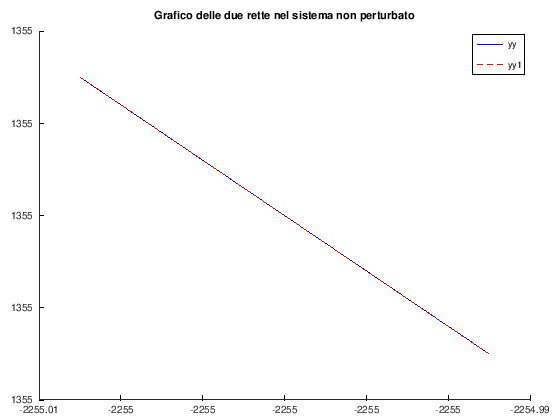

In [4]:
xx = linspace(-2255.005, -2254.995,100);
yy = (10 - 3 * xx ) / 5;
yy1 = (1 - 3.01 * xx) / 5.01;
yy2 = (1 - 3.02 * xx) / 5.01;

plot(xx,yy,'b-',xx,yy1,'r--')
title('Grafico delle due rette nel sistema non perturbato');
legend("yy", "yy1");
box off

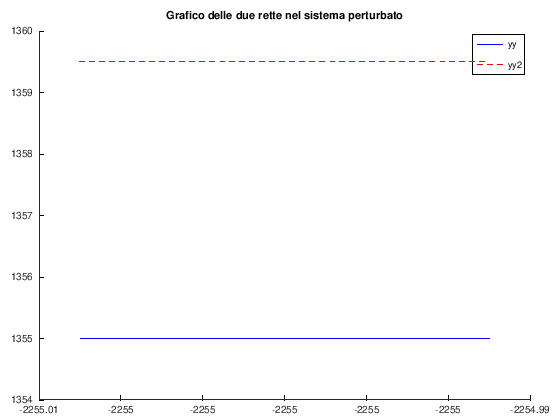

In [5]:
figure
plot(xx,yy,'b-',xx,yy2,'r--')
title('Grafico delle due rette nel sistema perturbato');
legend("yy", "yy2");
box off

### Sistema 2
Si memorizzano i dati, si calcola l'errore sui dati e sulle soluzioni introducendo le stesse perturbazioni viste in precedenza.

In [23]:
A_2 = [5 10; 4 2];
b_2 = [15; 6];
x_2 = A_2 \ b_2

A_p_2 = [5 10.1; 4 2];
x_p_2 = A_p_2 \ b_2

% si è scelta la norma ad infinito
err_dati_2 = norm(A_2 - A_p_2, inf) / norm(A_2, inf);
err_sol_2 = norm(x_2 - x_p_2, inf) / norm(x_2, inf);

fprintf("Errore sui dati: %.2f %%\n", err_dati_2*100)
fprintf("Errore relativo: %.2f %%\n", err_sol_2*100)
fprintf("Indice di condizionamento: %.2f \n", cond(A_2, "inf"))

x_2 =

   1.00000
   1.00000

x_p_2 =

   1.00658
   0.98684

Errore sui dati: 0.67 %
Errore relativo: 1.32 %
Indice di condizionamento: 6.00 


Sia l'errore sui dati che l'errore relativo risultano molto piccoli. Lo stesso vale per l'indice di condizionamento relativo alla risoluzione di questo secondo sistema lineare. Ciò significa che l'errore sui dati subirà un fattore di amplificazione ridotto.

Si può concludere che il problema risulta ben condizionato.

## Esercizio 4

In [27]:
clear A b x A_p x_p delta_A err_dati err_sol cond_A
A = [6 63 662.2; 63 662.2 6967.8; 662.2 6967.8 73393.5664];
b = [1.1; 2.33; 1.7];
x = A \ b

delta_A = zeros(3); delta_A(1,1) = 0.01;
A_p = A + delta_A; % matrice perturbata
x_p = A_p \ b % soluzione perturbata

% si è scelta la norma ad infinito
err_dati = norm(delta_A,inf) / norm(A,inf);
err_sol = norm(x-x_p,inf) / norm(x,inf);

fprintf("Errore sui dati: %.6f %%\n", err_dati * 100)
fprintf("Errore relativo: %.2f %%\n", err_sol * 100)
fprintf("Indice di condizionamento: %.3e \n", cond(A, "inf"))

x =

   136422.33758
   -25999.49957
     1237.44420

x_p =

   67.09867
   -9.66740
    0.31242

Errore sui dati: 0.000012 %
Errore relativo: 99.95 %
Indice di condizionamento: 1.975e+10 


## Esercizio 5

In questo esercizio a differenza dei due precedenti si perturba il dato relativo al vettore dei termini noti e si calcola l'errore relativo sui dati forniti nel vettore dei termini noti.

In [48]:
clear A b x A_p x_p delta_A err_dati err_sol cond_A
A = hilb(4);
b = ones(4,1);

fprintf("Indice di condizionamento: %.2e\n\n", cond(A,inf))
x = A\b

delta_b = 0.01 * [1; -1; 1; -1]; % fattore di perturbazione
b_p = b + delta_b;
x_p = A \ b_p

err_dati = norm(delta_b, inf) / norm(b, inf); % si è scelta la norma ad infinito
err_sol = norm(x - x_p, inf) / norm(x, inf);

% disp(err_dati * 100)
fprintf("Errore sui dati: %.3f %%\n", err_dati * 100)
fprintf("Errore relativo: %.2f %%", err_sol * 100)

Indice di condizionamento: 2.84e+04

x =

    -4.0000
    60.0000
  -180.0000
   140.0000

x_p =

    1.1600
    3.0000
  -43.8000
   51.8000

Errore sui dati: 1.000 %
Errore relativo: 75.67 %

Si ottiene che il problema risulta mal condizionato dato che l'indice è particolarmente alto. Inoltre l'errore commesso nell'approssimare i risultati delle operazioni è particolarmente alto.

## Esercizio 6

Dati due algoritmi di calcolo:

$fl(fl(a + b)\ *\ fl(a - b))$

$fl(fl(a^2) - fl((b^2))$

Si vuole determinare l'intervallo in cui il primo algoritmo risulta numericamente più stabile del secondo.
Si impiega il concetto di **indice algoritmico** e l'**espressione esplicita** di $fl_A(x)$.

Nel primo caso si calcola l'indice algoritmico e si ottiene che $I_{ALG} = 3$ dato che $\varepsilon_{alg} \le |\varepsilon_1| + |\varepsilon_2| + |\varepsilon_3| \le 3u$.

Nel secondo caso si ottiene che l'indice algoritmico varia in base ai valori assunti da $a$ e $b$. In particolare:

$$ I_{ALG} = 1 + \left| \frac{a^2}{a^2 - b^2} \right| + \left| \frac{b^2}{a^2 -b^2} \right| $$

## Esercizio 7

Si implementa un algoritmo di calcolo di un esponenziale che impiega lo sviluppo in serie di Taylor, detto `esp_taylor`.

Questo algoritmo va confrontato con l'output della funzione di libreria `exp` in termini di errore relativo

Si effettua un campionamento di $x$ su un numero di punti arbitrario e si calcolano i valori dell'esponenziale in quei punti.

In [49]:
% dati iniziali
a = -10; b = 10; num_camp = 1000; % campionamento di x in [a,b]
xc = linspace(a,b,num_camp);      % vettore con i valori campionati di x
exp_app = zeros(1, num_camp);     % vettore in cui memorizzare i ris.
exp_app2 = zeros(1, num_camp);    % vettore in cui memorizzare i ris.
nt = zeros(1, num_camp);          % indice n della serie
nt2 = zeros(1, num_camp);         % indice n della serie

### Implementazione dell'algoritmo per il calcolo dell'esponenziale
Si impiega come criterio di arresto il confronto fra l'approssimazione ottenuta ad una certa iterazione e quella successiva, quando i valori calcolati nelle due iterazioni coincidono non ha senso proseguire.

In [57]:
function [appr, n]=exp_taylor(x)
    old_appr = 0.e0;
    appr = 1.e0;
    tmp = 1.e0;
    n = 0;

    while old_appr ~= appr 
        old_appr = appr;
        n = n + 1;
        tmp = tmp * x/n;
        appr = old_appr + tmp;
    end
end

- Si calcola:
    - $n!$ come $(n-1)! \cdot n$
    - $x^n$ come $x^{(n-1)} \cdot x$
- Ad ogni passo si impiega la formula: 


$$ Exp_n = Exp_{n-1} + \frac{x^n}{n!}, per\ n \ge 1 $$

### Implementazione della versione migliorata dell'algoritmo per il calcolo dell'esponenziale
Maggiore accuratezza grazie all'impiego di un'operazione più stabile,


$$ e^x = \frac{1}{e^{-x}} $$

per il calcolo dell'esponenziale nel caso di esponente negativo.

In [62]:
function [appr_new, n] = exp_taylor_mk2(x)
    [appr_new, n] = exp_taylor(-x);
    appr_new = 1.e0 / appr_new; % exp(-x)=1/exp(x)
end

### Applicazione degli algoritmi

In [69]:
% calcolo con funzione di libreria
exp_esatto = exp(xc);

% calcolo con exp_taylor sul vettore delle ascisse e memorizzazione del
% risultato nel vettore exp_app
for i = 1:num_camp
   [exp_app(i), nt(i)] = exp_taylor(xc(i));
end

% calcolo errore relativo per il confronto tra il primo algoritmo e la
% funzione di libreria
err_rel_1 = abs(exp_app - exp_esatto)./abs(exp_esatto);

% calcolo con esp_taylor se l'esponente è positivo altrimenti con
% exp_taylor_mk2 se l'esponente è negativo.
for i = 1:num_camp
    if xc(i) >= 0
        [exp_app2(i), nt2(i)] = exp_taylor(xc(i));
    else
        [exp_app2(i), nt2(i)] = exp_taylor_mk2(xc(i));
    end
end 

% calcolo errore relativo per il confronto tra il primo algoritmo e la
% versione migliorata
err_rel_2 = abs(exp_app2 - exp_esatto)./abs(exp_esatto); 

### Rappresentazione grafica dei risultati

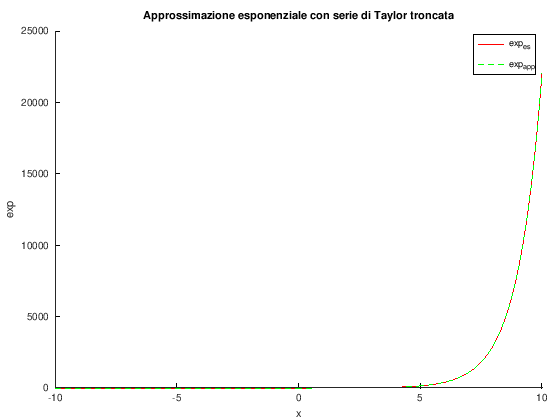

In [63]:
figure(1)
plot(xc,exp_esatto,'r',xc,exp_app,'--g')
xlabel('x')
ylabel('exp')
title('Approssimazione esponenziale con serie di Taylor troncata')
legend('exp_{es}','exp_{app}')
box off

Il calcolo dell'esponenziale che sfrutta la serie di Taylor dà risultati quasi identici rispetto alla funzione di libreria se si considera un grado di definizione modesto.

In realtà, come si nota dalle figure 2 e 3, il risultato ottenuto diverge notevolmente da quello della funzione di libreria. In particolare l'approssimazione per gli esponenziali con esponente negativo è pessima.

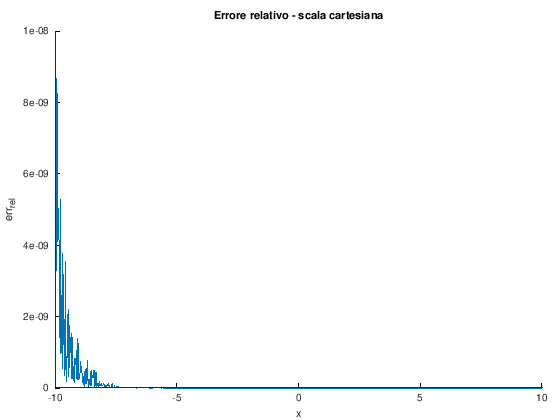

In [65]:
figure(2)
plot(xc,err_rel_1)
xlabel('x')
ylabel('err_{rel}')
title('Errore relativo - scala cartesiana')
box off

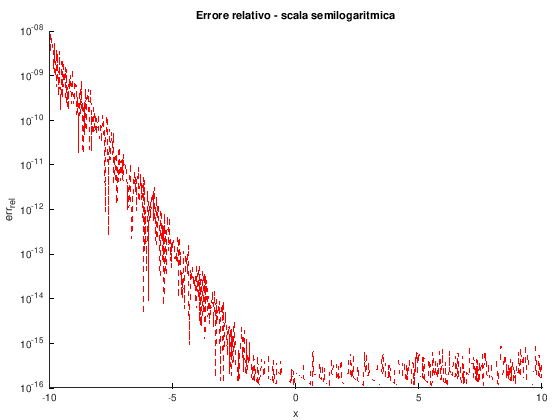

In [74]:
figure(3)
semilogy(xc, err_rel_1,'--r')
xlabel('x')
ylabel('err_{rel}')
title('Errore relativo - scala semilogaritmica')
box off
warning ("off", "Octave:negative-data-log-axis");

Dal grafico in figura 4 si nota che il numero di iterazioni richieste per il calcolo di un esponenziale con esponente negativo è tendenzialmente superiore rispetto al caso con esponente positivo.

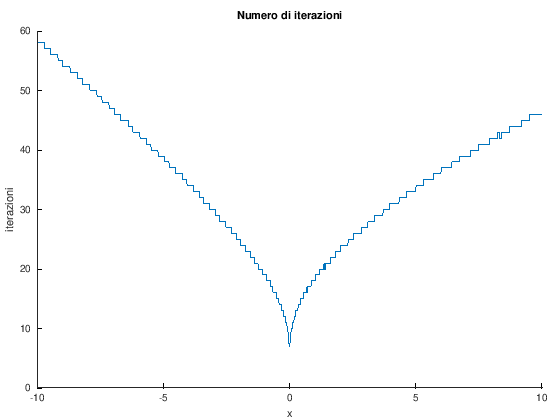

In [70]:
figure(4)
plot(xc,nt)
xlabel('x')
ylabel('iterazioni')
title('Numero di iterazioni')
box off

In figura 5 si nota che l'errore relativo che si ottiene nel calcolo di un esponenziale nell'intervallo $[a, b]$ con l'algoritmo più stabile determina ad un errore relativo totale minore, distribuito in modo quasi equo tra gli esponenziali con esponente negativo e positivo.

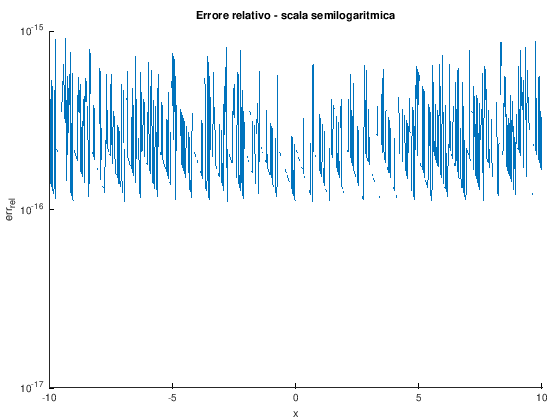

In [83]:
figure(5)
semilogy(xc,err_rel_2)
xlabel('x')
ylabel('err_{rel}')
title('Errore relativo - scala semilogaritmica')
box off

### Esercizio 8
Calcolo della derivata di $f(x) = sin(x)$ in $x = 1$ mediante il rapporto incrementale.

In [78]:
k = (0:-1:-20)';
h = 10.^k;
 
der_es = cos(1); % derivata esatta
x = 1; % punto in cui calcolare la derivata
rap_inc = (sin(x + h) - sin(x))./h; % rapporto incrementale
err_rel = abs(rap_inc - der_es)./abs(der_es); % errore relativo

Dal grafico si nota che per valori di $h < 1 \times 10^{-8}$ l'accuratezza dell'approssimazione fornita dal rapporto incrementale inizia a calare bruscamente da quella fornita dalla funzione di libreria.

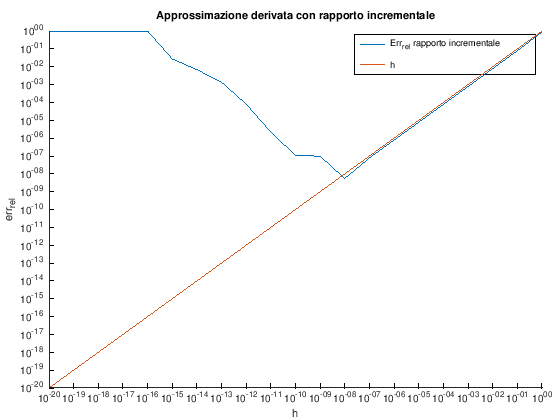

In [81]:
loglog(h, err_rel, h, h)

xlabel('h')
ylabel('err_{rel}')
title('Approssimazione derivata con rapporto incrementale')
legend('Err_{rel} rapporto incrementale','h')
box off